In [1]:
import os
os.listdir('./data')

['brand.csv',
 '.ipynb_checkpoints',
 'day2_project(학습자용).ipynb',
 'cars.csv']

# 중고자동차 가격 데이터 다루기

## 필수항목
- cars.csv 와 brand.csv파일 합치기
- 카테고리형 변수를 숫자 형태로 변환 (Engine, Emission Class)
- 결측치 처리하기
 - (Service history -> 'Unknown')
 - 일정 개수 이상일 경우 제거
- Scaler활용
- 기존 데이터의 정보 70%이상 PCA활용

# 데이터 확인

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
car_df = pd.read_csv('~/data/cars.csv')
brand_df = pd.read_csv('~/data/brand.csv')

In [7]:
display(car_df.head())
display(brand_df.head())

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


title을 기준으로 합치면 되지만, title의 값들이 다른 상황.
확인해서 맞춰주자.

In [14]:
temp = car_df.title.str.split().apply(lambda x: x[0])
display(temp.unique())
print(temp.nunique())

array(['SKODA', 'VAUXHALL', 'HYUNDAI', 'MINI', 'FORD', 'VOLVO', 'PEUGEOT',
       'BMW', 'CITROEN', 'MERCEDES-BENZ', 'MAZDA', 'SAAB', 'VOLKSWAGEN',
       'HONDA', 'MG', 'TOYOTA', 'SEAT', 'NISSAN', 'ALFA', 'RENAULT',
       'KIA', 'PROTON', 'FIAT', 'AUDI', 'MITSUBISHI', 'LEXUS', 'LAND',
       'CHEVROLET', 'SUZUKI', 'DACIA', 'DAIHATSU', 'JEEP', 'JAGUAR',
       'CHRYSLER', 'ROVER', 'DS', 'DAEWOO', 'DODGE', 'PORSCHE', 'SUBARU',
       'INFINITI', 'ABARTH', 'SMART', 'MARCOS', 'MASERATI', 'SSANGYONG',
       'LAGONDA', 'ISUZU'], dtype=object)

48


In [15]:
display(brand_df.title.unique())
print(brand_df.nunique())

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

title      48
country    12
dtype: int64


In [29]:
car_temp = car_df.copy()
car_temp['Full_name'] = car_temp['title']
car_temp["title"] = car_temp.title.str.split().apply(lambda x: x[0])

In [30]:
brand_df["title"] = brand_df.title.str.upper()

In [31]:
print(len(car_temp),len(brand_df))

3687 48


In [33]:
new_df = car_temp.merge(brand_df, how= 'inner')

title의 앞자리가 회사이름이라는 것을 활용하여, title로 묶어서 합쳐준다.
하지만, 종류도 있을 것 같아서 Full_name으로 따로 저장하여 묶어본다.

# 카데고리 -> 숫자 형태 변환

In [39]:
new_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Full_name,country
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA FABIA,Czech Republic
1,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA FABIA,Czech Republic
2,SKODA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,SKODA FABIA,Czech Republic
3,SKODA,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,SKODA FABIA,Czech Republic
4,SKODA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,SKODA FABIA,Czech Republic


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  Full_name          3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [38]:
len(new_df) - new_df.count()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
Full_name               0
country                 0
dtype: int64

결측치가있는 컬럼
- Previous Owners
- Engine
- Doors
- Seats
- Emission Class
- Service history

카테고리가 있는 컬럼
- Fuel type
- Body type
- Engine
- Gearbox
- Doors
- Seats
- Emission Class
- service history
- Full_name
- country

우선 service history의 결측치를 'Unknown'으로 채우자

In [43]:
new_df['Service history'] = new_df['Service history'].fillna('Unknown')

카테고리라고 생각한 컬럼들에 대해 unique() 값을 한번 봐보자

In [47]:
display(new_df['Fuel type'].unique())
display(new_df['Body type'].unique())
display(new_df['Engine'].unique())
display(new_df['Gearbox'].unique())
display(new_df['Doors'].unique())
display(new_df['Seats'].unique())
display(new_df['Emission Class'].unique())
display(new_df['Service history'].unique())
#display(new_df['Full_name'].unique())
display(new_df['country'].unique())


array(['Diesel', 'Petrol', 'Petrol Plug-in Hybrid', 'Electric',
       'Petrol Hybrid', 'Diesel Hybrid'], dtype=object)

array(['Hatchback', 'Estate', 'MPV', 'Saloon', 'SUV', 'Convertible',
       'Coupe', 'Combi Van', 'Minibus', 'Pickup'], dtype=object)

array(['1.4L', '1.9L', '1.2L', '1.8L', '1.6L', '2.0L', '1.0L', '1.5L',
       '1.3L', '2.2L', '2.8L', '1.7L', nan, '1.1L', '3.0L', '5.0L',
       '2.5L', '2.3L', '2.4L', '2.7L', '4.4L', '4.8L', '3.7L', '2.6L',
       '2.1L', '3.5L', '3.2L', '5.5L', '6.3L', '0.9L', '3.1L', '4.3L',
       '4.2L', '0.8L', '3.3L'], dtype=object)

array(['Manual', 'Automatic'], dtype=object)

array([ 5.,  4.,  3.,  2., nan])

array([ 5.,  4.,  7.,  2., nan,  6.,  3.])

array(['Euro 6', 'Euro 4', 'Euro 5', 'Euro 3', 'Euro 2', nan, 'Euro 1'],
      dtype=object)

array(['Unknown', 'Full'], dtype=object)

array(['Czech Republic', 'United Kingdom', 'South Korea', 'United States',
       'Sweden', 'France', 'Germany', 'Japan', 'Spain', 'Italy',
       'Malaysia', 'Romania'], dtype=object)

음..뭔가 카테고리가 많은 것 같은 느낌이 드는데,
우선 확실한 것을 바꿔 볼까?
결측치부터 해결해보자

결측치가있는 컬럼
- Previous Owners : median 값을 적용시키기로 결정
    - 삭제하기에는 중고차 값에 어느정도 영향이 있을 수 있음
- Engine
- Doors
- Seats
- Emission Class
- Service history

### Previous Owners

In [83]:
new_df[~(new_df['Previous Owners'].isnull())]['Previous Owners'].mean()

2.8075571177504393

In [82]:
df_fillPO = new_df.copy()
df_fillPO['Previous Owners'] = df_fillPO['Previous Owners'].fillna(3.0)
df_fillPO.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Full_name,country
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,SKODA FABIA,Czech Republic
1,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,SKODA FABIA,Czech Republic
2,SKODA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,SKODA FABIA,Czech Republic
3,SKODA,1995,84000,2008,3.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,Unknown,SKODA FABIA,Czech Republic
4,SKODA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,Unknown,SKODA FABIA,Czech Republic


빠른 진행을 위해서, 우선 결측치가 있는 행들을 제거해보자

In [136]:
df_temp = df_fillPO.dropna()

df_temp = df_temp.drop('Full_name',axis=1)
df_temp = df_temp.drop('Engine', axis=1)

In [138]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 0 to 3684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3593 non-null   object 
 1   Price              3593 non-null   int64  
 2   Mileage(miles)     3593 non-null   int64  
 3   Registration_Year  3593 non-null   int64  
 4   Previous Owners    3593 non-null   float64
 5   Fuel type          3593 non-null   object 
 6   Body type          3593 non-null   object 
 7   Gearbox            3593 non-null   object 
 8   Doors              3593 non-null   float64
 9   Seats              3593 non-null   float64
 10  Emission Class     3593 non-null   object 
 11  Service history    3593 non-null   object 
 12  country            3593 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 393.0+ KB


In [139]:
df_one = pd.get_dummies(df_temp, columns = ['title','Fuel type','Body type','Gearbox','Emission Class','Service history','country'],drop_first= True)

In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
# You may need to replace X with your actual feature matrix

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_one)

# Apply PCA
pca = PCA()
X_pca = pca.fit(X_scaled)


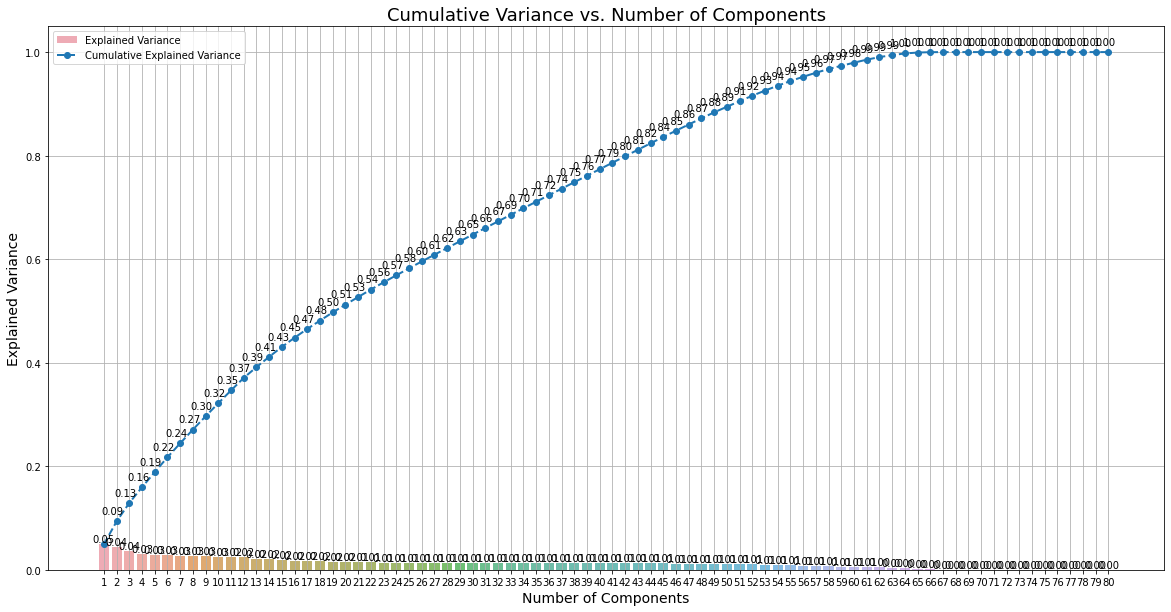

In [147]:
# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_
# explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# cumsum: 각 원소의 누적합을 계산하는 함수
plt.figure(figsize=(20, 10)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [152]:
pca = PCA(n_components=50)
pca_data = pca.fit_transform(X_scaled)

In [151]:
df_temp

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Gearbox,Doors,Seats,Emission Class,Service history,country,cluster
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic,1
1,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic,1
2,SKODA,1990,150000,2007,2.0,Diesel,Hatchback,Manual,5.0,5.0,Euro 4,Full,Czech Republic,0
3,SKODA,1995,84000,2008,3.0,Petrol,Hatchback,Manual,5.0,5.0,Euro 4,Unknown,Czech Republic,0
4,SKODA,2495,124138,2011,3.0,Petrol,Hatchback,Automatic,5.0,5.0,Euro 5,Unknown,Czech Republic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MASERATI,16000,66000,2008,3.0,Petrol,Coupe,Automatic,2.0,4.0,Euro 4,Full,Italy,2
3681,MASERATI,13900,63000,2014,5.0,Diesel,Saloon,Automatic,4.0,5.0,Euro 5,Unknown,Italy,2
3682,MASERATI,10000,72000,2009,3.0,Petrol,Saloon,Automatic,4.0,5.0,Euro 4,Full,Italy,2
3683,SSANGYONG,12995,42771,2018,2.0,Diesel,SUV,Automatic,5.0,5.0,Euro 6,Unknown,South Korea,1


In [158]:
pca_data = pd.DataFrame(pca_data, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# 인덱스로 빼 두었던 CustomerID 다시 추가
#data_pca.index = data.index
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-1.566213,-0.851557,-0.274269,-0.400349,-0.111967,-0.064857,-0.127113,-0.279381,0.322930,0.125046,...,-0.049168,-0.074105,0.296484,0.017841,0.384329,-2.066289,-0.402992,1.423922,-1.071096,0.826809
1,-1.566213,-0.851557,-0.274269,-0.400349,-0.111967,-0.064857,-0.127113,-0.279381,0.322930,0.125046,...,-0.049168,-0.074105,0.296484,0.017841,0.384329,-2.066289,-0.402992,1.423922,-1.071096,0.826809
2,1.352948,-0.381386,-1.052812,-0.450869,-0.176421,-0.265249,-0.031260,-0.004129,0.077711,0.137130,...,0.004920,-0.030877,0.355871,0.091736,0.440971,-1.827626,-1.154493,1.509579,-0.542366,0.289817
3,1.548671,-0.986760,-0.357581,-0.046646,-0.080466,-0.198022,-0.153900,-0.118905,-0.119690,0.371559,...,-0.003299,-0.061216,0.359127,-0.056309,0.439416,-2.440892,-0.975160,1.297502,-0.899362,0.595647
4,0.849882,-0.038222,-0.542409,-0.604256,0.054706,-0.013365,0.112591,0.450283,0.230912,-0.042495,...,0.004336,-0.093857,0.371140,-0.161069,0.400993,-2.548948,-0.012120,1.319434,-0.781796,0.318576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,0.337234,3.347453,4.490089,2.365322,-1.946480,1.910654,1.648479,-1.692167,0.352023,-1.694786,...,3.689473,4.822366,7.792171,-7.858981,5.148671,-2.723751,7.931896,-5.052466,3.011325,4.697745
3589,-0.406100,3.185096,1.826988,0.853649,-1.223256,2.089915,1.827979,-0.674166,0.691391,-2.208770,...,3.540715,4.835253,7.693867,-7.494073,5.906434,-2.772031,9.469329,-7.326967,3.220935,6.255829
3590,0.595385,2.742525,2.087711,1.620985,-1.472757,1.546754,1.596878,-1.343983,0.481900,-1.821417,...,3.609357,4.819584,7.640262,-7.527179,5.613724,-2.571088,8.149353,-7.112170,3.246359,5.937059
3591,-4.548732,0.626432,-2.222195,1.219661,0.304072,0.558453,5.112007,0.916214,-2.636013,0.307473,...,17.170374,-3.659232,0.548193,20.611241,5.266866,-3.949214,-2.593965,-1.303537,0.581441,1.246280


In [159]:
from sklearn.cluster import KMeans
from collections import Counter

# k=3개의 클러스터로 K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(pca_data)

# 각 클러스터의 빈도수 구하기
cluster_frequencies = Counter(kmeans.labels_) 

# 빈도수에 기반하여 이전 레이블에서 새 레이블로의 매핑 생성
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# 매핑을 적용하여 새 레이블 얻기
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# 원래 데이터셋에 새 클러스터 레이블 추가
df_temp['cluster'] = new_labels

# PCA 버전의 데이터셋에 새 클러스터 레이블 추가
pca_data['cluster'] = new_labels

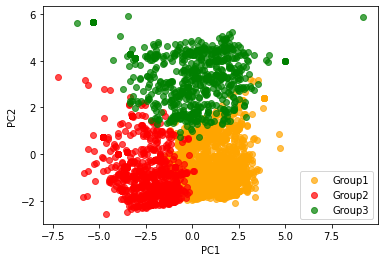

In [161]:
cluster_0 = pca_data[pca_data['cluster'] == 0]
cluster_1 = pca_data[pca_data['cluster'] == 1]
cluster_2 = pca_data[pca_data['cluster'] == 2]


# 클러스터 별 시각화
plt.scatter(cluster_0['PC1'], cluster_0['PC2'], color = 'orange', alpha = 0.7, label = 'Group1')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], color = 'red', alpha = 0.7, label = 'Group2')
plt.scatter(cluster_2['PC1'], cluster_2['PC2'], color = 'green', alpha = 0.7, label = 'Group3')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

가장 기본적인 방법으로 전 방법들을 참고하여 kmeans의 세그룹으로 나눠보았다. 꽤 잘되었다고 느껴지는중에서도 몇개의 이상치라 할만한 데이터들이 좀 보이는 것 같다.

In [189]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, MinMaxScaler
# Assuming X is your feature matrix
# You may need to replace X with your actual feature matrix

# Scale the data
r_scaler = RobustScaler()
m_scaler = MinMaxScaler()
r_scaled = r_scaler.fit_transform(df_one)
m_scaled = m_scaler.fit_transform(df_one)

# Apply PCA
r_pca = PCA()
m_pca = PCA()
r_pca = r_pca.fit(r_scaled)
m_pca = m_pca.fit(m_scaled)

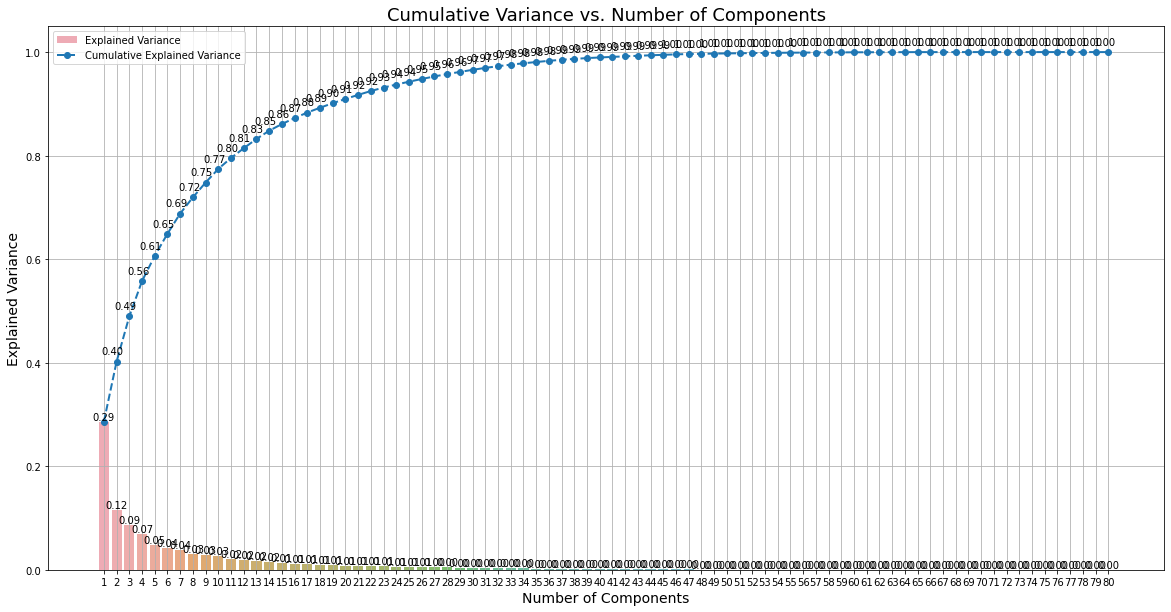

In [190]:
# Explained Variance의 누적합 계산  
explained_variance_ratio = r_pca.explained_variance_ratio_
# explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# cumsum: 각 원소의 누적합을 계산하는 함수
plt.figure(figsize=(20, 10)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

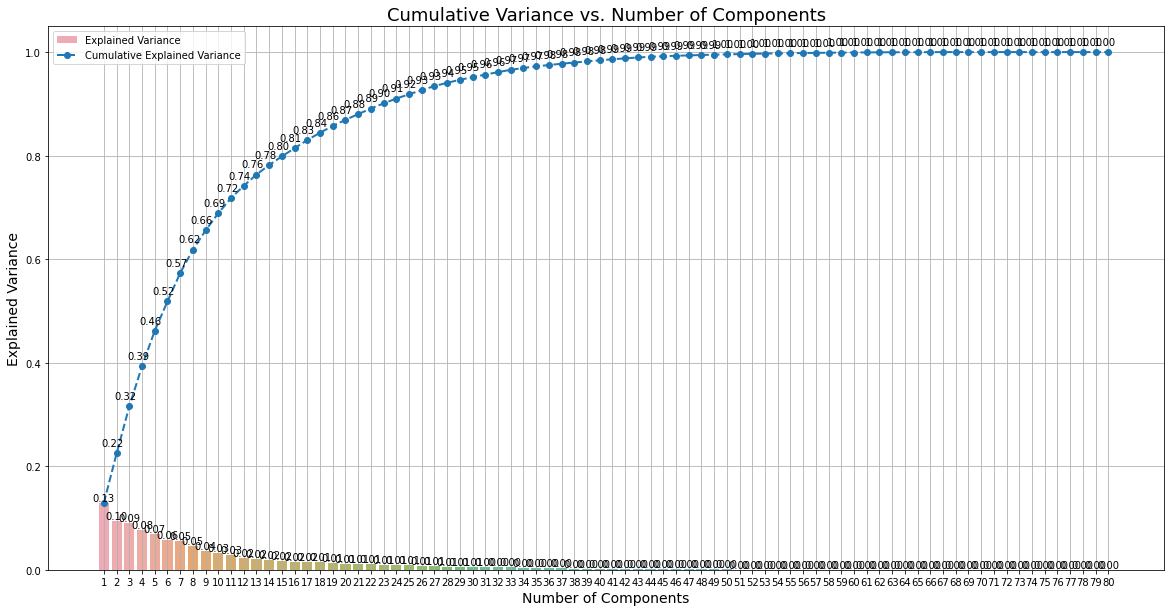

In [191]:
# Explained Variance의 누적합 계산  
explained_variance_ratio = m_pca.explained_variance_ratio_
# explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# cumsum: 각 원소의 누적합을 계산하는 함수
plt.figure(figsize=(20, 10)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

robust는 15~ 18 정도가 괜찮다고 생각
minmax는 20~28 정도가 괜찮다고 생각

In [165]:
df_temp.groupby(['cluster','country'])['Price'].mean()

cluster  country       
0        Czech Republic     3808.542857
         France             2691.886792
         Germany            3473.342282
         Italy              2926.153846
         Japan              3198.206497
         Malaysia           1342.500000
         South Korea        3302.350515
         Spain              3491.115385
         United Kingdom     3093.601770
         United States      2926.358255
1        Czech Republic     8246.038462
         France            10105.621762
         Germany           14169.579365
         Italy              7539.515152
         Japan             11054.046358
         Romania            7439.571429
         South Korea        9994.025641
         Spain             14326.142857
         Sweden             8995.000000
         United Kingdom     9435.434783
         United States      9823.834783
2        Czech Republic     1595.000000
         France             4775.000000
         Germany            7144.694885
         Italy  

클러스터링을 통해 나눈 데이터의 기준이 보일 듯 말듯하다. 따라서 다시 돌아가서 상관관계를 보도록 하자.

In [167]:
df_temp = df_fillPO.dropna()

df_temp = df_temp.drop('Full_name',axis=1)
df_temp = df_temp.drop('Engine', axis=1)

In [170]:
df_temp.groupby('Emission Class')['Price'].mean()

Emission Class
Euro 1     2750.000000
Euro 2     2208.956522
Euro 3     2265.489051
Euro 4     2504.071228
Euro 5     4612.130573
Euro 6    10803.858431
Name: Price, dtype: float64

### 그전에! 국가별 총 브랜드 갯수

In [172]:
df_temp.groupby('country')['title'].count()

country
Czech Republic     63
France            518
Germany           842
Italy             127
Japan             590
Malaysia            2
Romania            14
South Korea       178
Spain              59
Sweden             45
United Kingdom    718
United States     437
Name: title, dtype: int64

## 상관관계 파악
중점은 price에 대한 예측이니 우선 price와의 상관관계를 보기로 하자.
혹은 완전히 겹치는 애들이 있는지 파악해보자

In [173]:
df_temp.columns

Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Gearbox', 'Doors',
       'Seats', 'Emission Class', 'Service history', 'country'],
      dtype='object')

In [181]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 0 to 3684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3593 non-null   object 
 1   Price              3593 non-null   int64  
 2   Mileage(miles)     3593 non-null   int64  
 3   Registration_Year  3593 non-null   int64  
 4   Previous Owners    3593 non-null   float64
 5   Fuel type          3593 non-null   object 
 6   Body type          3593 non-null   object 
 7   Gearbox            3593 non-null   object 
 8   Doors              3593 non-null   float64
 9   Seats              3593 non-null   float64
 10  Emission Class     3593 non-null   object 
 11  Service history    3593 non-null   object 
 12  country            3593 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 522.0+ KB


In [183]:
df_temp.title.nunique()

45

In [185]:
df_temp.groupby(df_temp.title)['Price'].agg(['min','max','mean'])

,min,max,mean
title,,,
ABARTH,4950,17000,11216.333333
ALFA,1500,12599,3197.388889
AUDI,595,25000,7717.627586
BMW,1289,28240,8354.840909
CHEVROLET,1795,5999,3331.642857
CHRYSLER,1475,3495,2433.800000
CITROEN,993,14436,4664.494624
DACIA,3400,14899,7439.571429
DAEWOO,995,995,995.000000


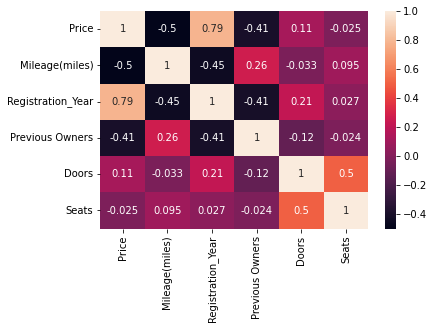

In [179]:
corr_matrix = df_temp.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 회고

오늘은 preprocessing과 관련하여 pca까지 여러 방법을 통해서 진행해보았다. 오늘 느꼈던 것은 기존 머신러닝의 단점이 매우 주관적이고 크다는 것인데, 이는 필요한 데이터 컬럼을 선별하는 과정에서 데이터 사이언티스트의 주관적 관점이 제일 많이 들어가기 때문이라고 생각한다. 따라서, 여기서 좋은 모델을 만들기 위해서는 카테고리 컬럼을 어떻게 처리하는지 그리고 상관관계 분석을 통한 좋은 피쳐들의 선별 등이 매우 중요하다고 느꼈다. 결론적으로, 트레디셔널 머신러닝의 전처리 단계에서는 데이터 사이언티스트들의 다양한 관점에서의 분석과 피쳐에 대한 이해 그리고 나아가 보이지 않는 피쳐들까지 얻어내야하는 어려움에 대한 과정을 경험하는 단계였다고 생각한다.